In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Classification and Regression Trees

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions.

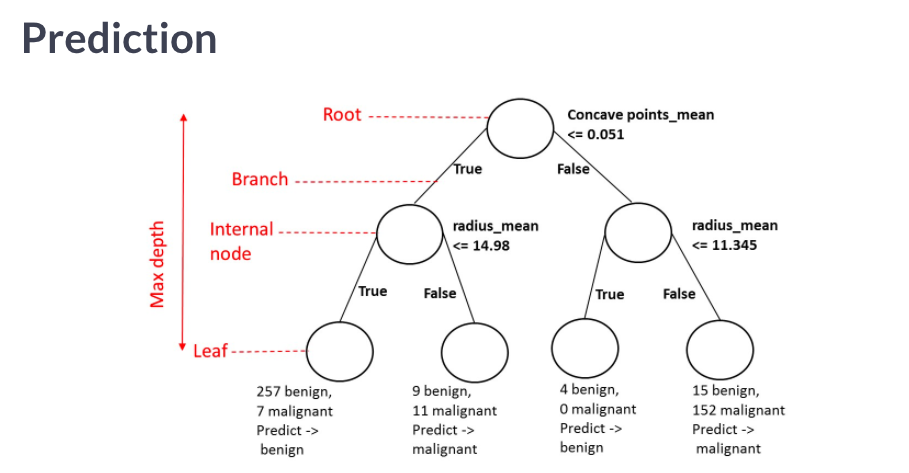

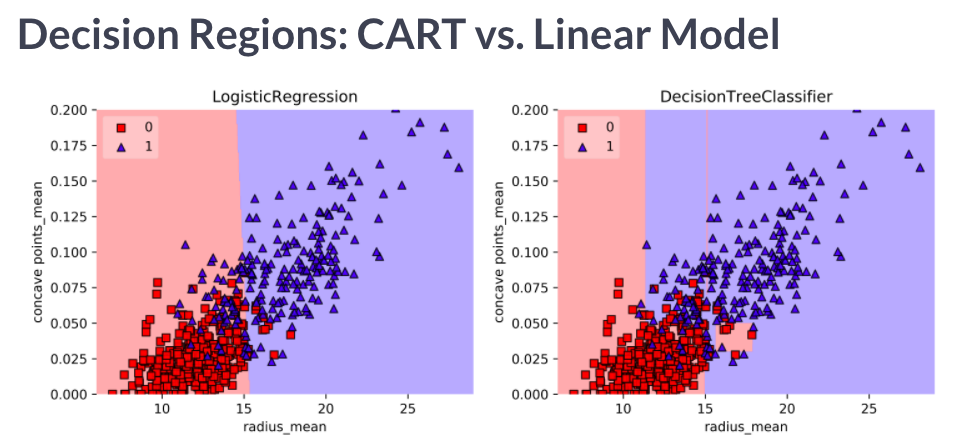

A classification decision tree produces rectangular decision regions. THis happens because at each split of the decision tree, only one feature is involved.

In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [50]:
file = 'https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv'
df = pd.read_csv(file)

In [51]:
X = df[['radius_mean','concave points_mean']]
y = df['diagnosis'].replace(['M','B'], [1,0])

In [52]:
# Import train_test_split
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [36]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


In [37]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


### How does DT compare with Logistic Regression?

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

plot_labeled_decision_regions is a udf in datacamp. Try replicating it. The output should be exactly like the decision regions plotted above.

### Classification tree Learning


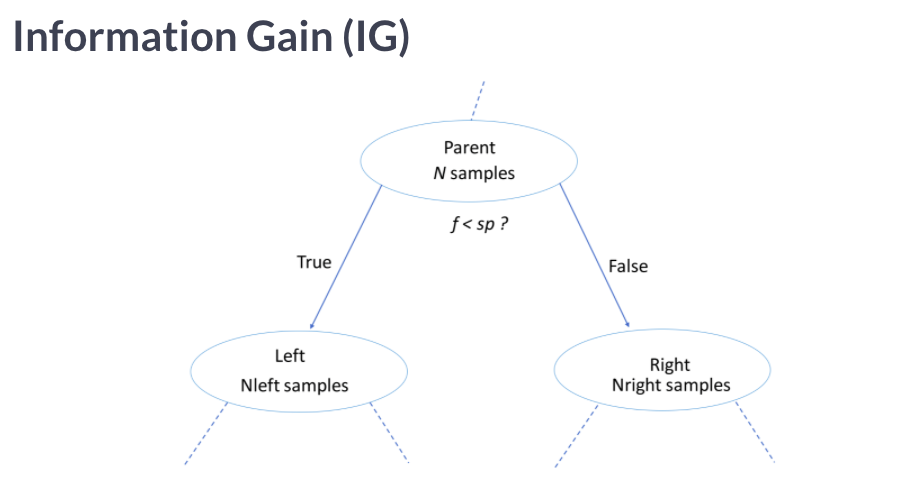

The tree tries to maximize Information gain at each node. 

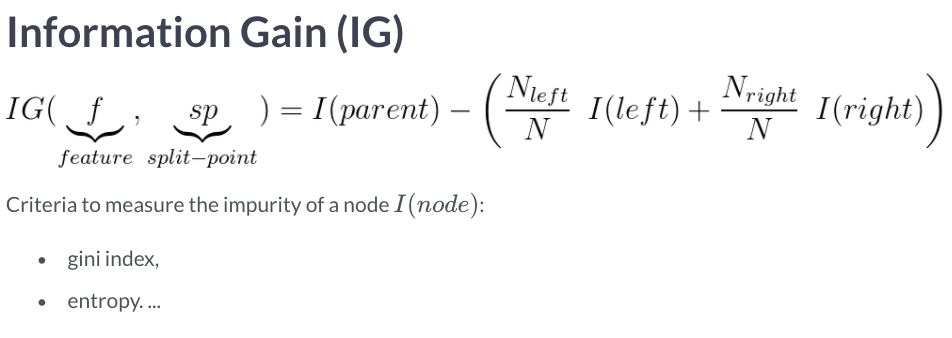

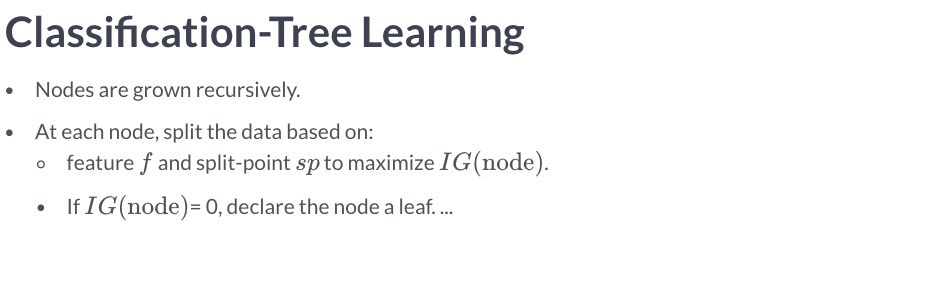

IMPORTANT: This is only valid for unconstrained models. If we set a depth of 2, then regardless of what the IG is, the latest nodes are set as leaves.

In [61]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

In [62]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Fit dt_entropy to the training set and predict results
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

# Fit dt_gini to the training set and predict results
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using the gini index:  0.9210526315789473


### Decision tree for regression

min_samples_leaf is another stopping condition specifying minimum percentage of training data that must exist in the leaf.

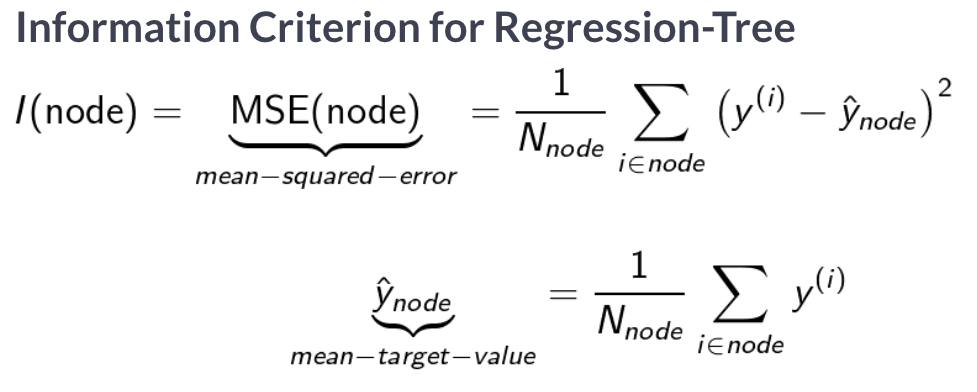

This means that the tree tries to find the splits that produce the leafs where in each leaf where the target values are on average as close as possible to the mean value of labels in that particular leaf. 

The prediction therefore is the average of target variables contained in that particular leaf. 

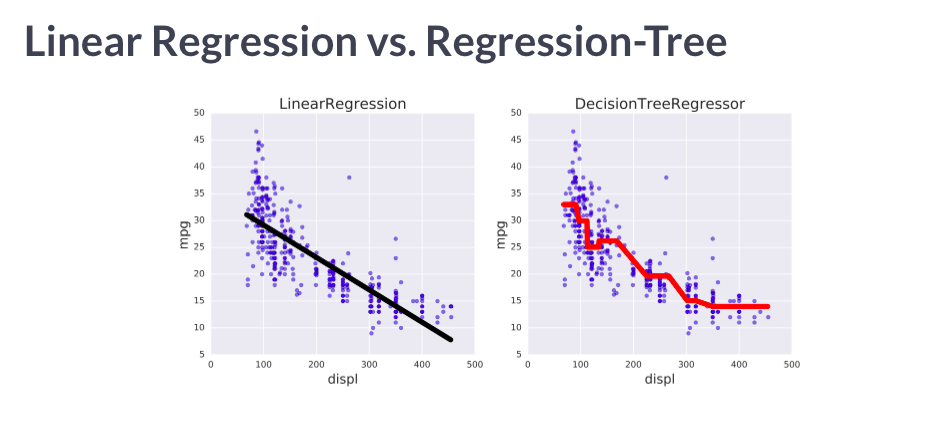

Decision tree captures non-linearity but there is still room for improvement.

In [88]:
file = 'https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
df = pd.read_csv(file)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

labelencoder_X = LabelEncoder()
X['labelnums'] = labelencoder_X.fit_transform(X['origin'])

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(X[['labelnums']]).toarray())

X = X.join(enc_df)
X = X.rename(columns={0: "origin_Asia", 1: "origin_Europe", 2: "origin_US"}).drop(['origin'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Training Regressor Tree

In [105]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [106]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


### How does this compare with Linear Regression?

In [108]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


# 2. Bias-Variance Tradeoff

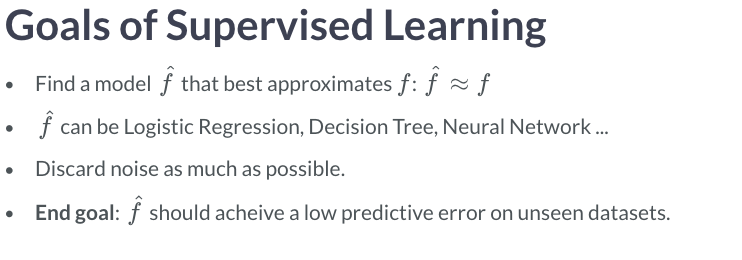

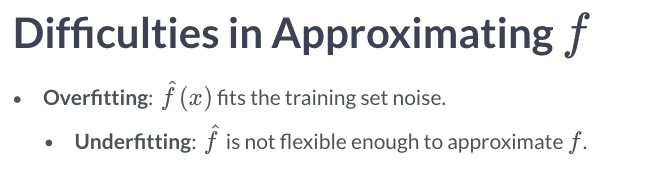

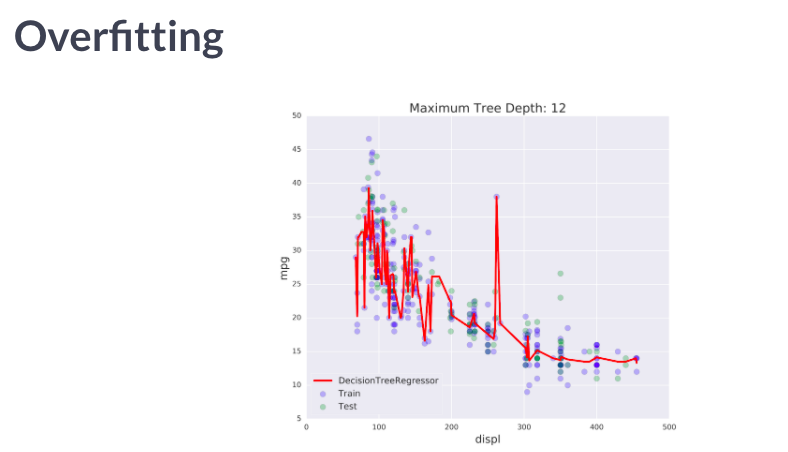

Overfitting happens when there is low training set error and high test set error.

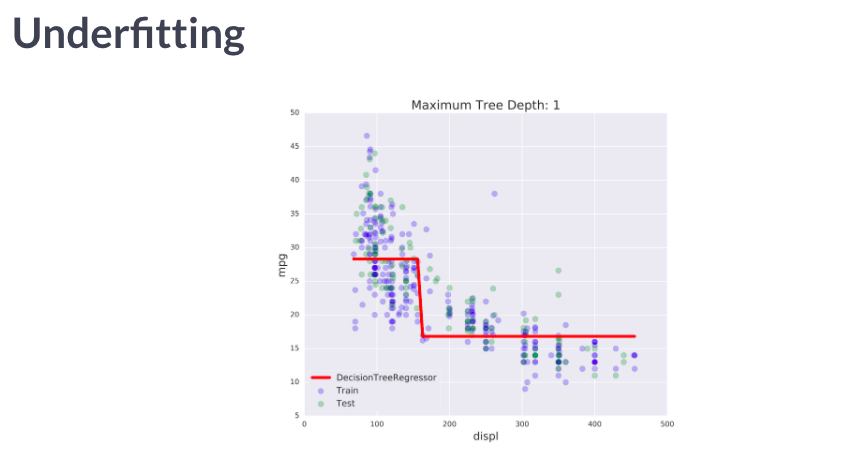

Here the training set error is closer to test set error. However, both errors are relatively high. The trained model does not capture the complex dependence between x and y. 

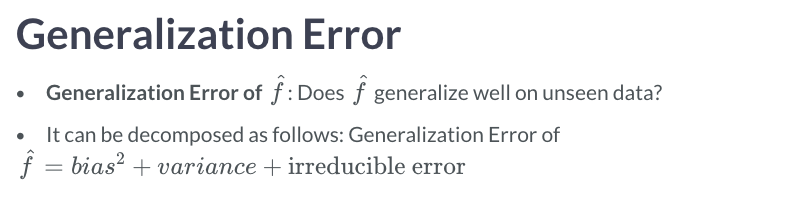

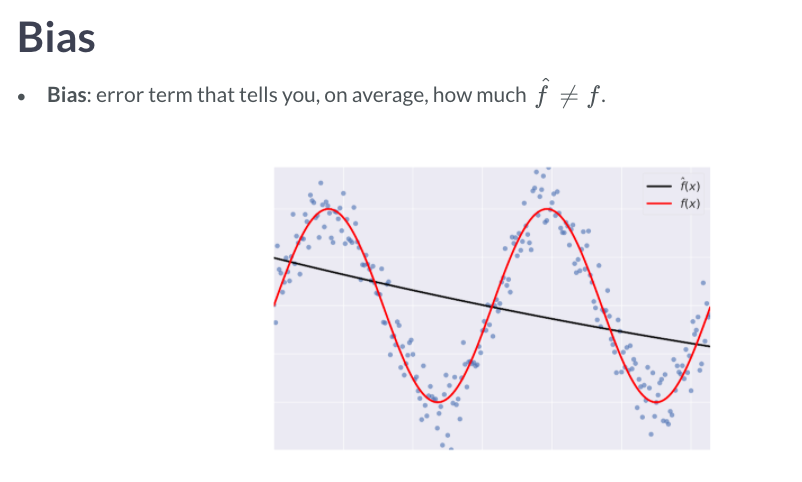

Here black function has very high bias. This function would generalize really well on unseen data but does not represent the actual function f well enough. This leads to underfitting. 

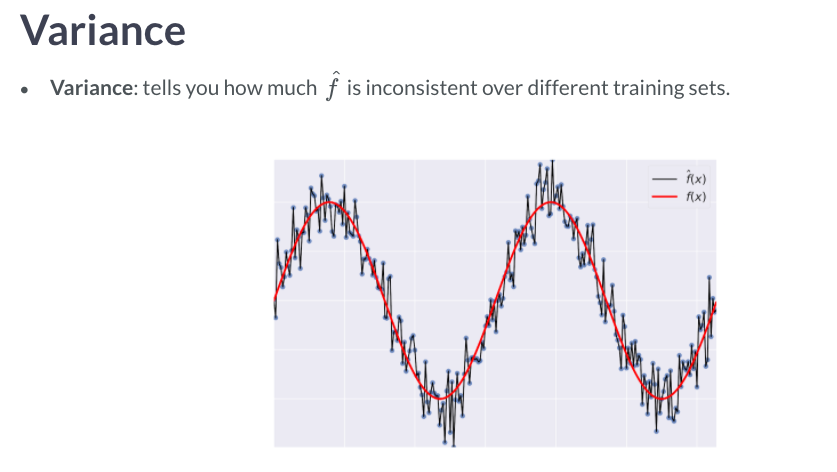

Here the black funciton f^ has very high variance because this function misses the true function f and would be not fit different training sets at all.

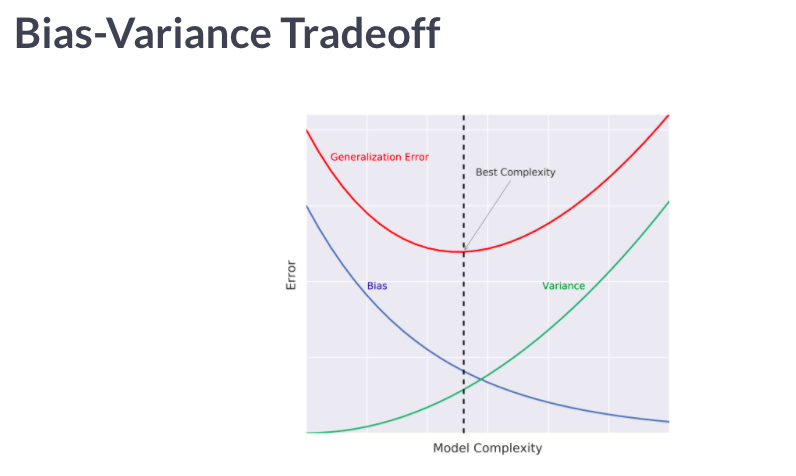

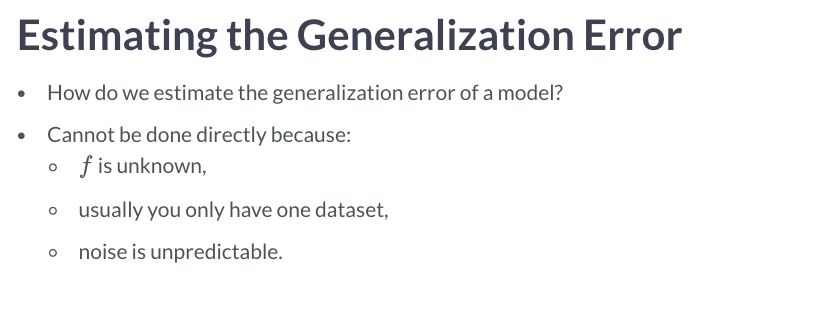

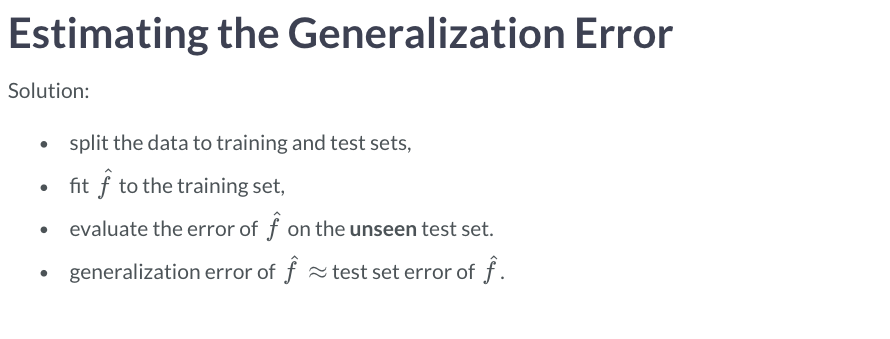

Important: f^ on training set cannot be judged as final evaluation because there is bias involved and f^ has already seen all the training points. And since we should only keep the test set for final evaluation, The best methodology to get a close-to-accurate generalization error of f^ should be using k-fold cross validation. Recall in lesson 20 under regression.

A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

CROSS VALIDATION ERROR = sum of each error / number of folds

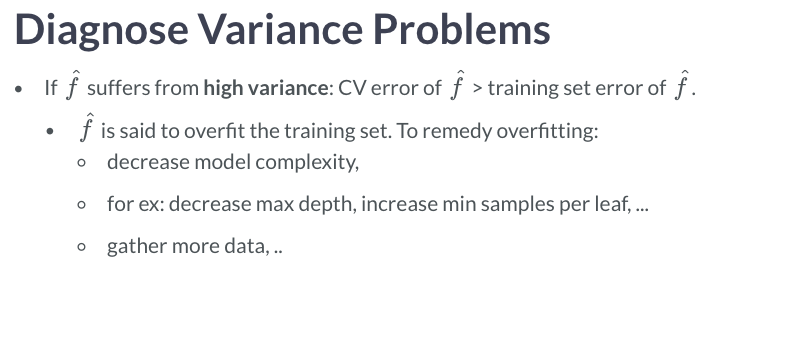

`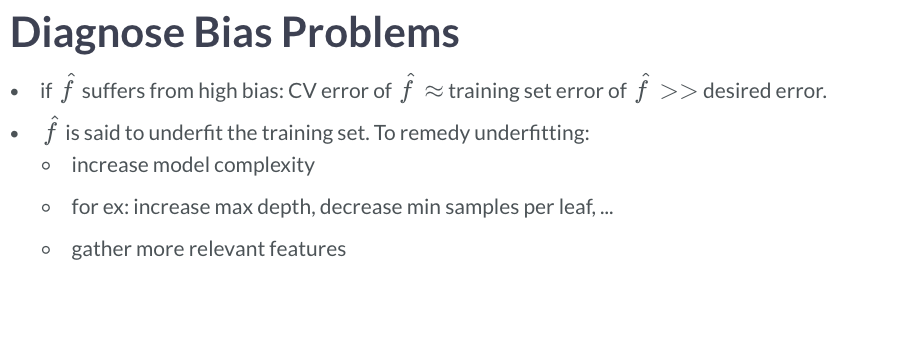

In [111]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In [112]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


Cross val score does not allow to score mSE directly. Hence negative mean squared error

In [113]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


Notice how CV RMSE and Training set RMSE are roughly equal. Let's assume that the LR  RMSE calculated in chapter 1 is underfitting and is the baseline RMSE. It was 5.1 and this training set RMSE is higher than that. Hence, this a high bias problem since and dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

### Ensemble Learning

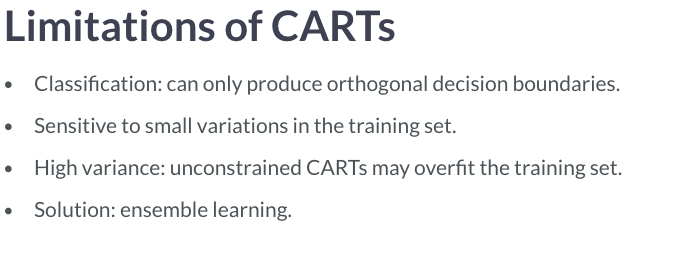

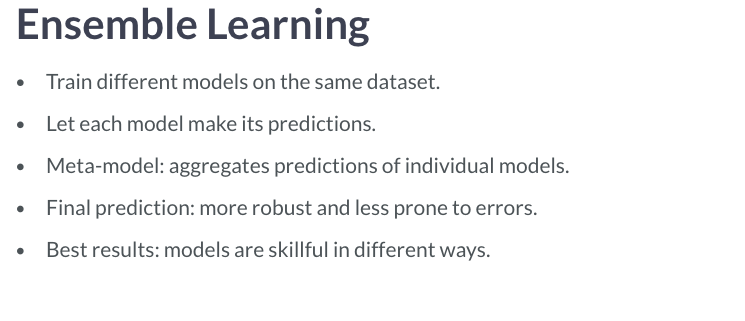

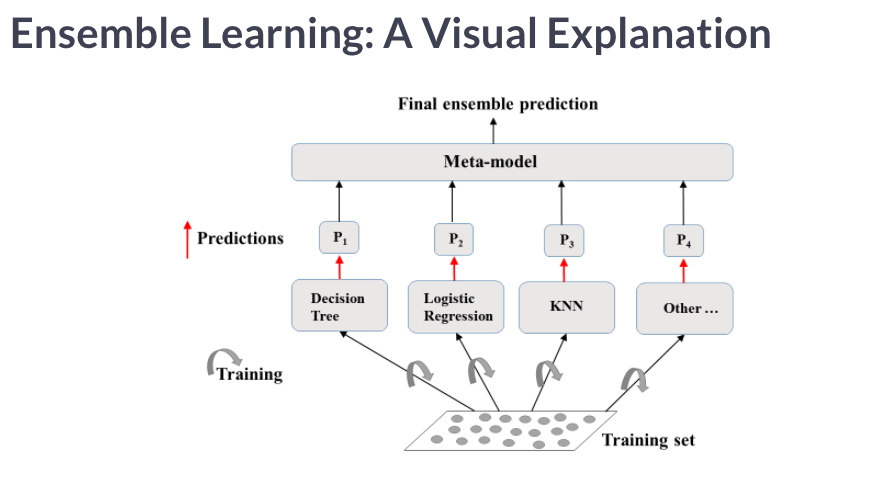

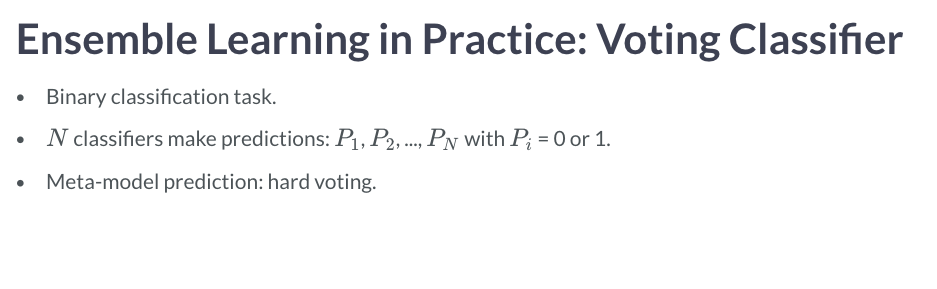

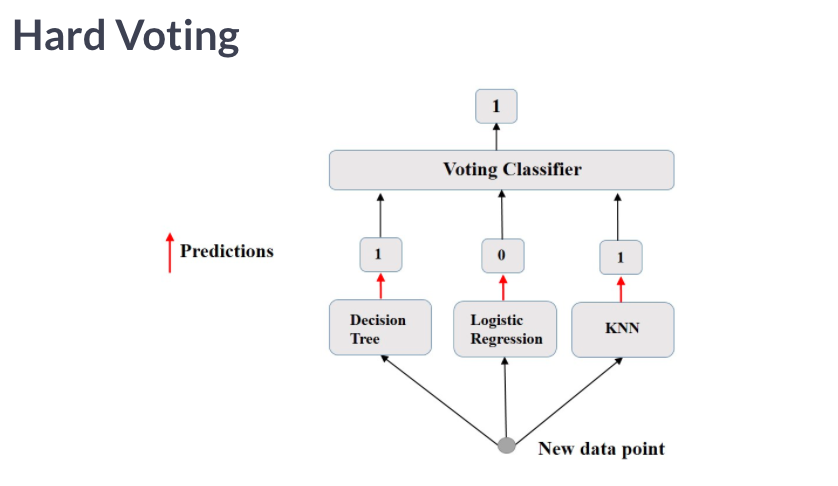

#### ExAMPLE

In [117]:
file = 'datasets/22_CART/indian_liver_patient/indian_liver_patient_preprocessed.csv'
df = pd.read_csv(file)

In [119]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [121]:
X.shape


(579, 11)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [116]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [125]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression : 0.747
K Nearest Neighbours : 0.724
Classification Tree : 0.730


In [126]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.753


/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Notice how we achieved higher accuracy by doing a voting classifier rather than 

# 3. Random Forrests and Bagging

### Bagging = Bootstrap Aggregation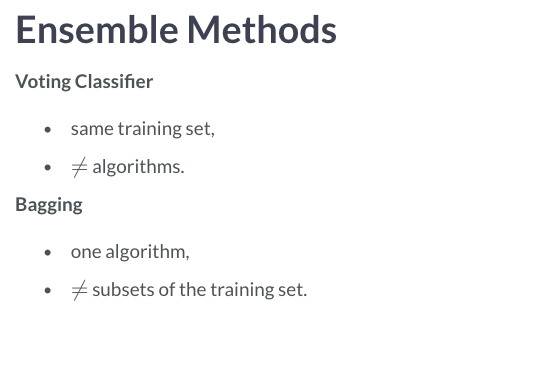

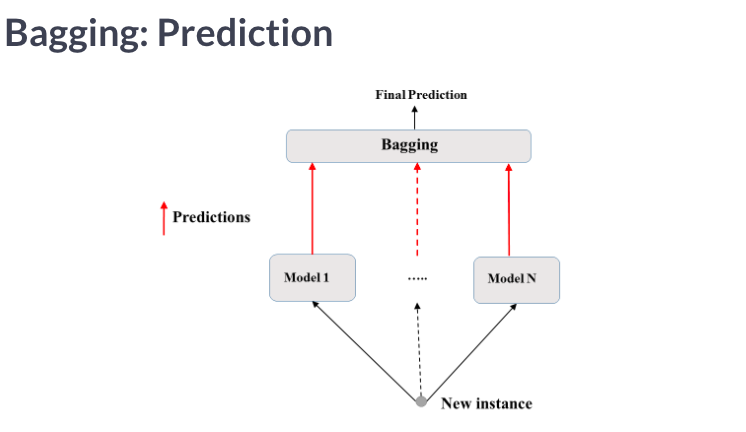

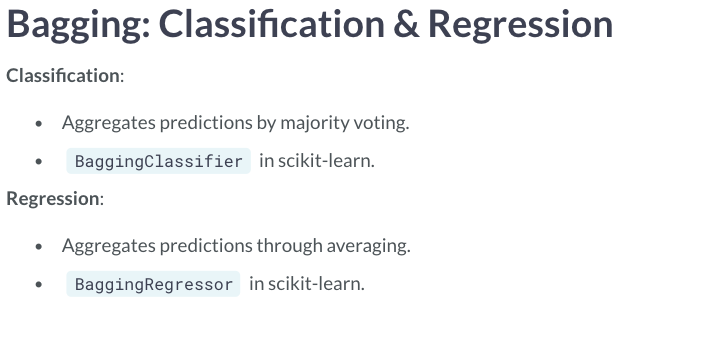

In [127]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.73


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))

Test set accuracy of dt: 0.66


Notice the improvement in score of bc compared to a single DT.

### OUT OF BAG EVALUATION

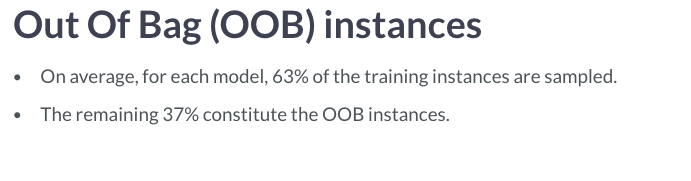

Since OOB instances are not sampled by a model, these can be used to estimate the performance of ensemble without CV.

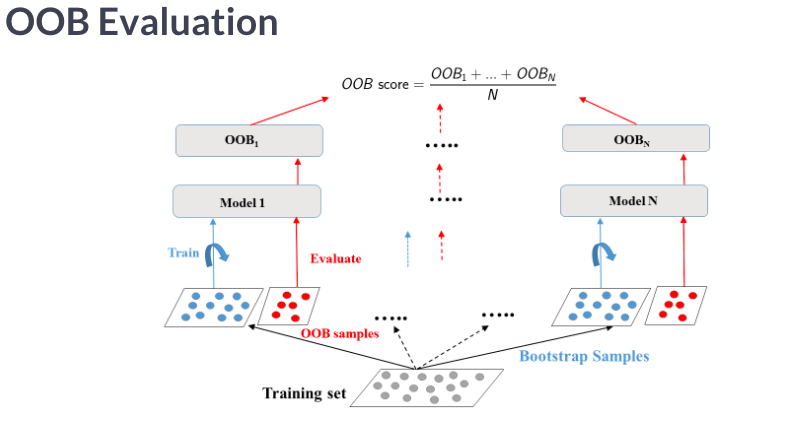

here OOB1, OOB 2... OOBn is the evaluation done on each OOB sample.

In [182]:
file = 'datasets/22_CART/indian_liver_patient/indian_liver_patient.csv'
df = pd.read_csv(file)

In [183]:
df['is_male'] = df['Gender'].replace(['Female','Male'], [0,1])

In [184]:
df = df.drop('Gender', axis =1)

In [185]:
df['Dataset'] = df['Dataset'].replace(2,0)

In [186]:
X = df.loc[:, df.columns != 'Dataset'].fillna(0)
y = df.loc[:,'Dataset']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [188]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)

In [189]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

print('OOB accuracy: {:.3f}'.format(acc_oob))

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)



# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}'.format(acc_test))

OOB accuracy: 0.719
Test set accuracy: 0.667


### RANDOM FORESTS

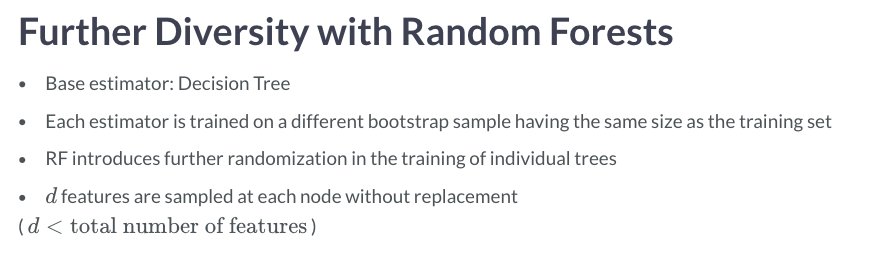

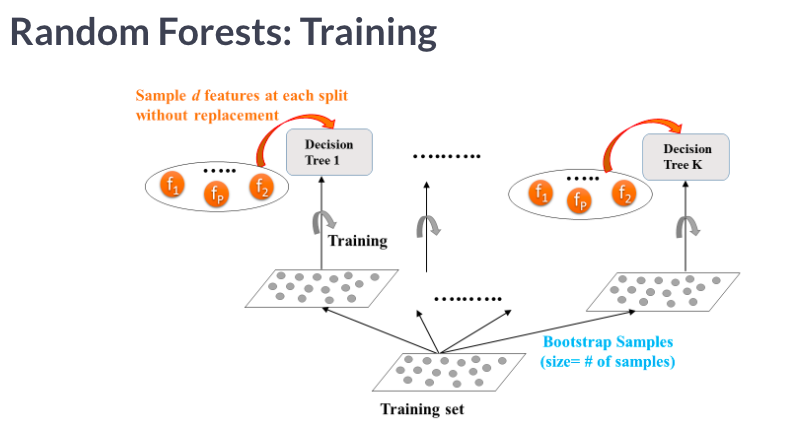

In [190]:
file = 'https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv'
df = pd.read_csv(file)

In [192]:
X = df.loc[:,df.columns != 'cnt']
y = df.loc[:,'cnt']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [214]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)                           

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [215]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


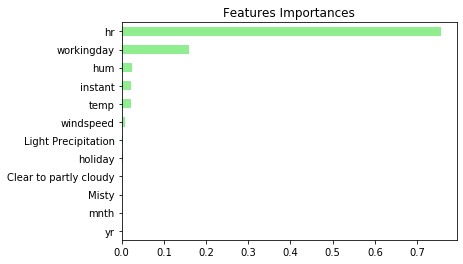

In [216]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# 4. Boosting

Boosting is an ensemble method where many predictors are trained and each predictor learns from its predecessor.

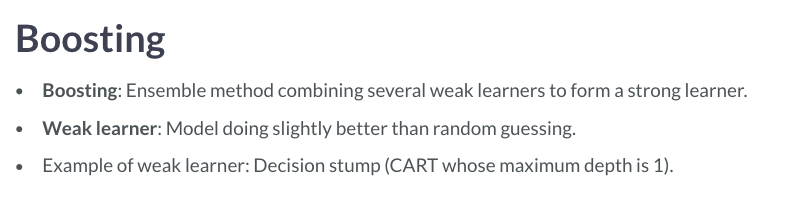

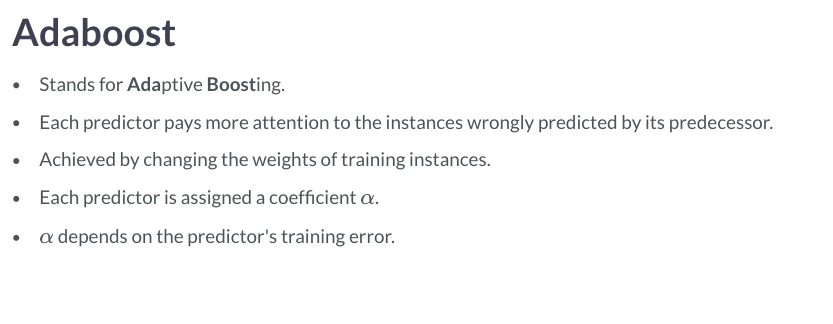

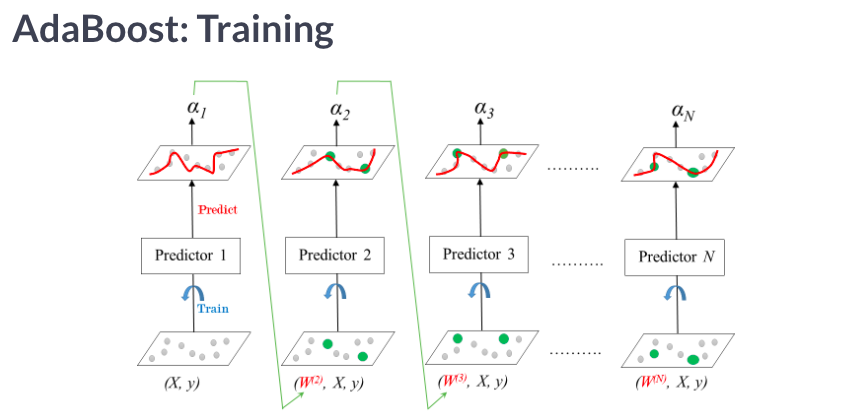

Notice how the incorrectly predicted instances (green) are given higher weights in subsequent models. 

An important parameter in training is the learning rate η, where 0 < η <= 1, which is used to shrink the coefficient alpha of a trained predictor. It's important to note that there is a tradeoff between eta and number of estimators. A smaller value of eta should be compensated by greater number of estimators. The predictions of Adaboost in case of classification happens through weighted majority voting. For regression, it is weighted average. 

In [267]:
file = 'datasets/22_CART/indian_liver_patient/indian_liver_patient.csv'
df = pd.read_csv(file)
df = df.dropna()

In [268]:
df['is_male'] = df['Gender'].replace(['Female','Male'], [0,1])

In [269]:
df = df.drop('Gender', axis =1)

In [270]:
df['Dataset'] = df['Dataset'].replace(2,0)

In [271]:
X = df.loc[:, df.columns != 'Dataset']
y = df.loc[:,'Dataset']

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [292]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [293]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)

In [295]:
y_pred_proba

array([[0.506898  , 0.493102  ],
       [0.42888877, 0.57111123],
       [0.45861929, 0.54138071],
       [0.50866069, 0.49133931],
       [0.47312167, 0.52687833],
       [0.36433673, 0.63566327],
       [0.33085957, 0.66914043],
       [0.2406854 , 0.7593146 ],
       [0.32128703, 0.67871297],
       [0.48866268, 0.51133732],
       [0.33445719, 0.66554281],
       [0.51510913, 0.48489087],
       [0.52220263, 0.47779737],
       [0.50079109, 0.49920891],
       [0.51710698, 0.48289302],
       [0.44981761, 0.55018239],
       [0.40797827, 0.59202173],
       [0.47655155, 0.52344845],
       [0.4007643 , 0.5992357 ],
       [0.53095285, 0.46904715],
       [0.44082103, 0.55917897],
       [0.44008435, 0.55991565],
       [0.52207131, 0.47792869],
       [0.48193521, 0.51806479],
       [0.43909474, 0.56090526],
       [0.47991756, 0.52008244],
       [0.3818508 , 0.6181492 ],
       [0.54279573, 0.45720427],
       [0.54516548, 0.45483452],
       [0.4556443 , 0.5443557 ],
       [0.

y_pred_proba is a 2D numpy array with first element of each observation is probability of obtaining the negative class and second one is probability of obtaining a positive class

In [296]:
y_pred_proba = y_pred_proba[:,1]

In [297]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.74


### Gradient Boosting

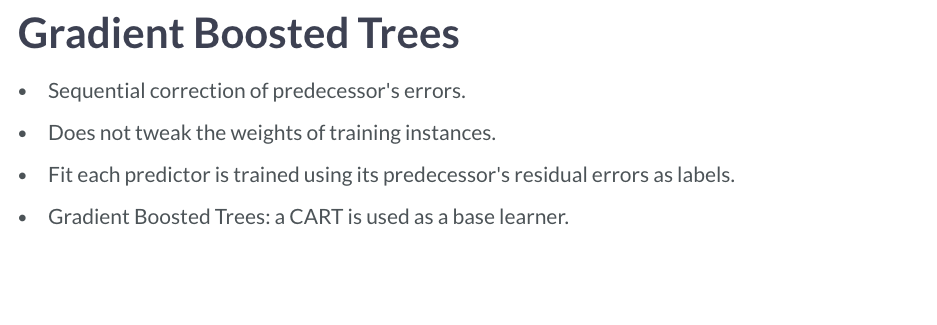

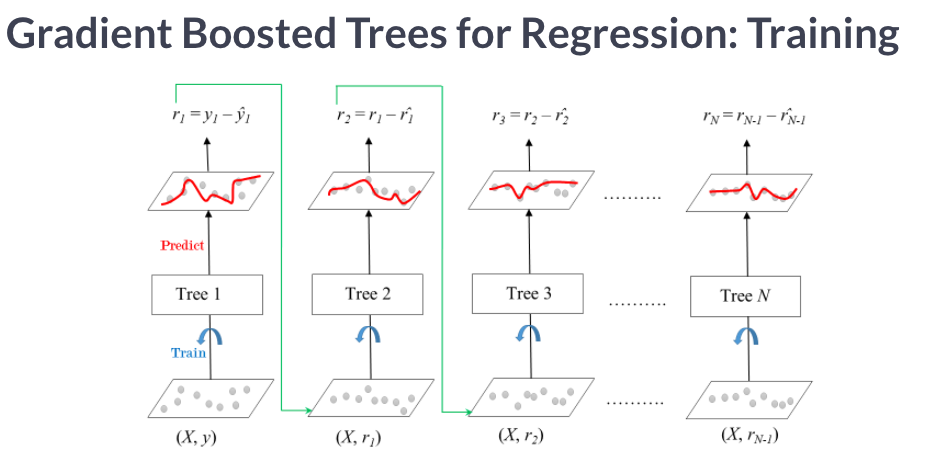

note: here r1 is residual of first model. r2 is **residual of a residual.** This process is repeated until all of the N trees forming the ensemble are trained. An important parameter used in training gradient boosted trees is shrinkage. Shrinkage, eta, refers to the fact that each tree in the ensemble is shrinked after it is multiplied by a learning rate eta which is a number between 0 and 1. 

Similarly to Adaboost, there is a tradeoff between eta and number of estimators. Decreasing the learning rate has to be compensated by increasing the number of estimators in order for the ensemble to reach desired performance. 

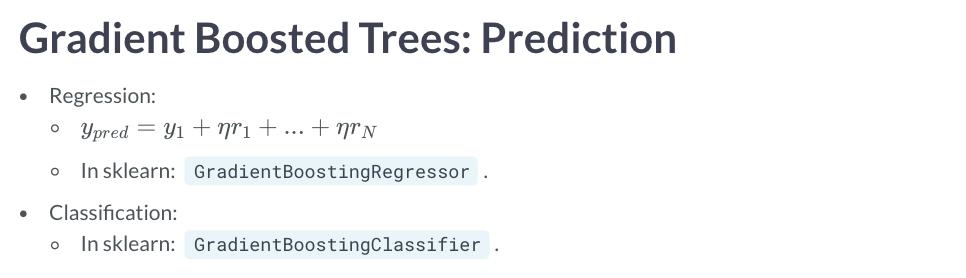

In [312]:
file = 'https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv'
df = pd.read_csv(file)

In [313]:
X = df.loc[:,df.columns != 'cnt']
y = df.loc[:,'cnt']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [328]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

In [329]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [330]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** (1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.796


### Stochastic Gradient Bossting

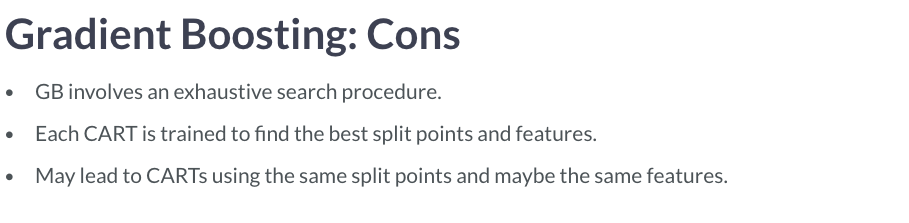

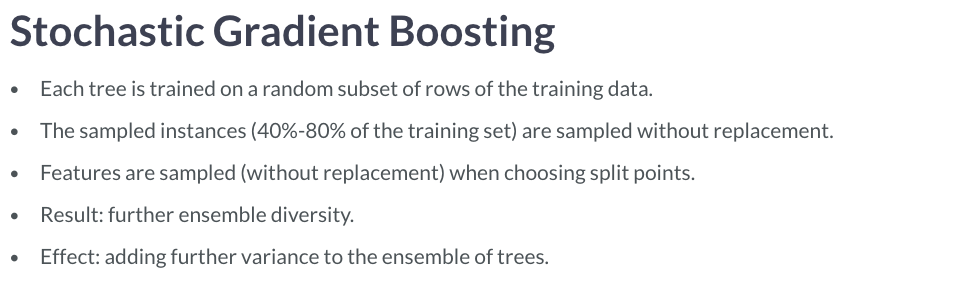

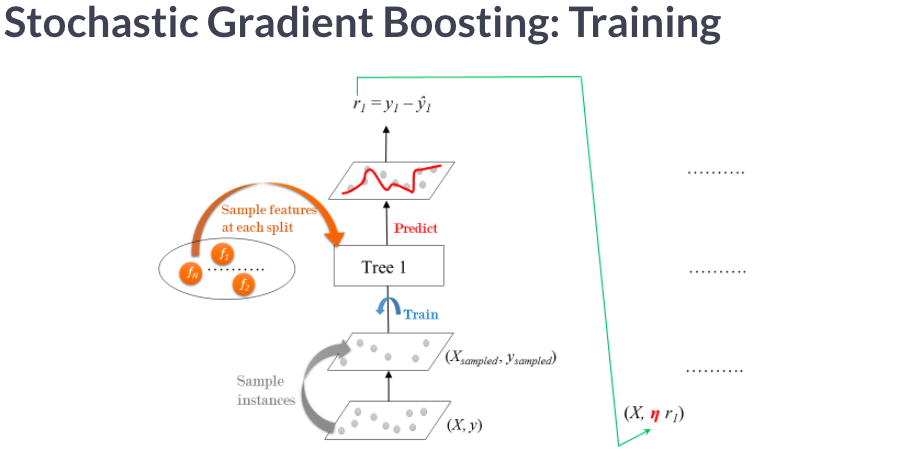

Note: not all features are used when splitting. 

In [331]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.9,#this is to sample 90 percent of the data
                                 max_features=0.75,
                                 n_estimators=200,                                
                                 random_state=2)

In [332]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [333]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.944


# 5. Tuning Hyperparameters

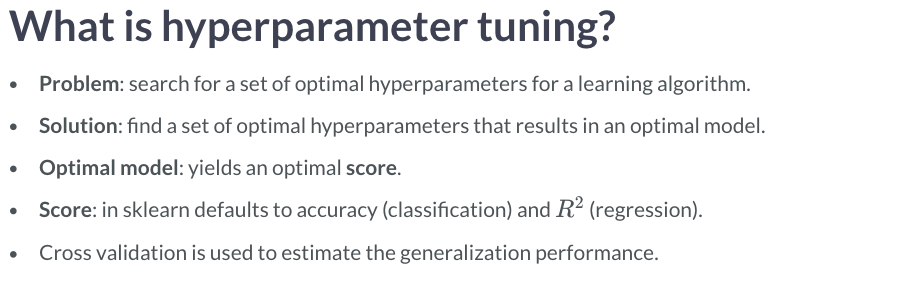

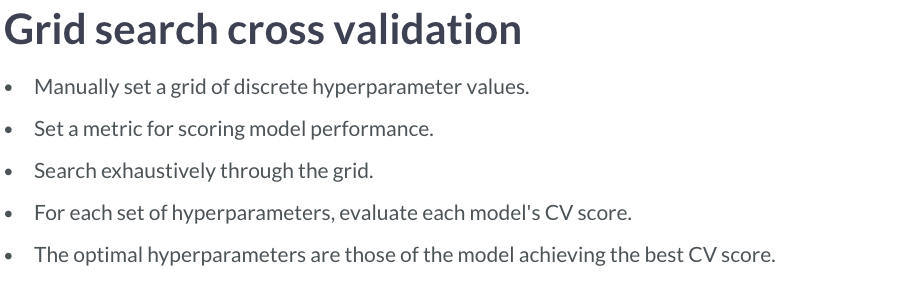

In [369]:
file = 'datasets/22_CART/indian_liver_patient/indian_liver_patient_preprocessed.csv'
df = pd.read_csv(file)

In [370]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [371]:
X.shape


(579, 11)

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [375]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier()

In [376]:
#Obtain parameters of Model

dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [377]:
# Define params_dt
params_dt = {
             'max_depth': [2, 3, 4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
            }

In [378]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

In [379]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

#fit model to training set
grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.677


/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Tuning For Random Forrest Models


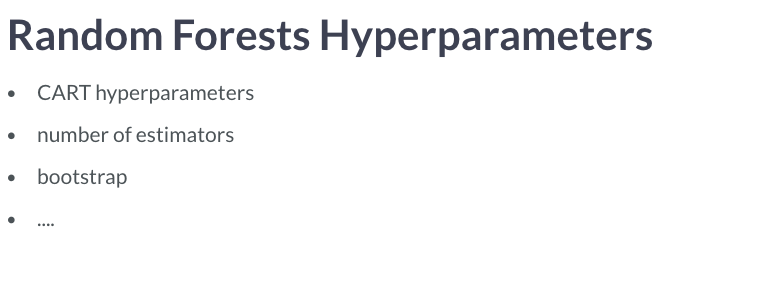

In [380]:
file = 'https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv'
df = pd.read_csv(file)

In [381]:
X = df.loc[:,df.columns != 'cnt']
y = df.loc[:,'cnt']

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [383]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

In [384]:
# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }

In [385]:
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [386]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   16.0s finished
/Users/chiragkamra/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=25, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt']

In [387]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 54.236
